# Classificador sem PCA (Stellar)

In [557]:
import pandas as pd
import numpy as np
import time

dataset_stellar = pd.read_csv("Stellar//star_classification.csv", delimiter=',')
X = dataset_stellar.loc[: , dataset_stellar.columns != 'class'].values
y = dataset_stellar["class"].values

len(dataset_stellar.columns)

18

In [558]:
np.unique(y, return_counts=True)

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([59445, 18961, 21594], dtype=int64))

In [559]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

from sklearn.preprocessing import StandardScaler
scale_obj = StandardScaler()
X = scale_obj.fit_transform(X.astype(float))

from sklearn.model_selection import train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.15)

In [560]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=400)
start_time = time.perf_counter()
model.fit(XTrain, yTrain)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

Tempo de treino: 7.358027199999924


In [561]:
model.score(XTest, yTest)

0.9575333333333333

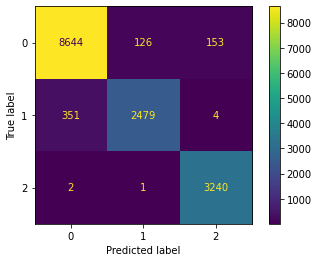

In [562]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, XTest, yTest)

# Classificador com PCA (Stellar)

In [563]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=10)
XTrain = pca.fit_transform(XTrain)
XTest = pca.transform(XTest)

In [564]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=400)
start_time = time.perf_counter()
model.fit(XTrain, yTrain)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

Tempo de treino: 2.0205201000007946


In [565]:
model.score(XTest, yTest)

0.9515333333333333

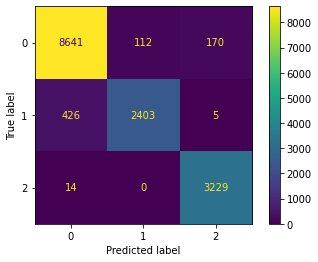

In [566]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, XTest, yTest)

# Visualização PCA

In [567]:
from sklearn.decomposition import PCA
pca_viewer = PCA(n_components=2)
principal_components = pca_viewer.fit_transform(XTrain)

# Percentage of variance explained for each components
print(pca_viewer.explained_variance_ratio_)

[0.28565611 0.2126633 ]


In [568]:
principal_components_df = pd.DataFrame(data = principal_components, 
                                       columns = ['principal component 1', 'principal component 2'])

principal_components_df

,principal component 1,principal component 2
0,3.087091,-0.405982
1,-1.233378,0.141640
2,-0.233054,-0.041385
3,-1.487828,0.163208
4,2.914022,-0.352277
...,...,...
84995,0.095942,-0.084152
84996,0.523247,-0.142619
84997,-3.522355,0.452469
84998,1.785751,-0.313902


In [569]:
yTrain.astype(int)
yTrain = np.where(yTrain == 0, 'GALAXY', yTrain)
yTrain = np.where(yTrain == '1', 'QSO', yTrain)
yTrain = np.where(yTrain == '2', 'STAR', yTrain)

<Figure size 432x288 with 0 Axes>

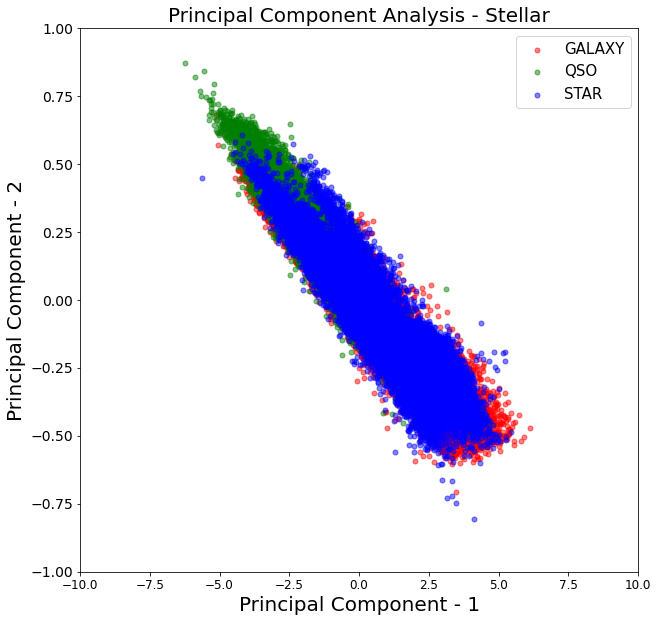

In [570]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)
plt.xlim(-10, 10)
plt.ylim(-1, 1)
plt.title("Principal Component Analysis - Stellar",fontsize=20)
targets = ['GALAXY', 'QSO', 'STAR']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = yTrain == target
    plt.scatter(principal_components_df.loc[indicesToKeep, 'principal component 1'], 
                principal_components_df.loc[indicesToKeep, 'principal component 2'], 
                c = color, s = 25, alpha=0.5)

plt.legend(targets,prop={'size': 15})
plt.show()

# Referências

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
https://www.geeksforgeeks.org/principal-component-analysis-with-python/
https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17/code
https://www.kaggle.com/iabhishekofficial/mobile-price-classification
https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python